In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import json

In [5]:
invoice_df = pd.read_csv('C:/Users/sofpa/Downloads/fct_invoice.csv')

In [8]:
customer_df = pd.read_json('C:/Users/sofpa/Downloads/dim_customer.json')

EASY

1. How many unique customers are in the dataset?

In [14]:
invoice_df['customer_id'].nunique()

5191

2. What are the different categories of products available? How many unique categories are there?

In [19]:
', '.join(invoice_df['category'].unique())

'Clothing, Shoes, Books, Cosmetics, Food & Beverage, Toys, Technology, Souvenir'

In [22]:
invoice_df['category'].nunique()

8

3. Which payment method is the most popular? How many times was it used?

In [27]:
''.join(invoice_df['payment_method'].mode())

'Cash'

In [30]:
len(invoice_df[invoice_df['payment_method']=='Cash'])

44447

MEDIUM

1. What are the three most popular categories, by total sales?

In [37]:
invoice_df['total_sales'] = invoice_df['quantity'] * invoice_df['price']

In [40]:
invoice_df.groupby(by=['category']).sum()['total_sales'].nlargest(3).reset_index()

,category,total_sales
0,Clothing,1.139968e+08
1,Shoes,6.655345e+07
2,Technology,5.786235e+07


2. What are the total sales attributed to customers over the age of 45?

In [45]:
over_45 = customer_df[customer_df['age'] > 45]
id_45 = over_45['id']
invoice_45 = invoice_df[invoice_df['customer_id'].isin(id_45)]
(invoice_45['price'] * invoice_45['quantity']).sum()

82039768.15

3. How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)

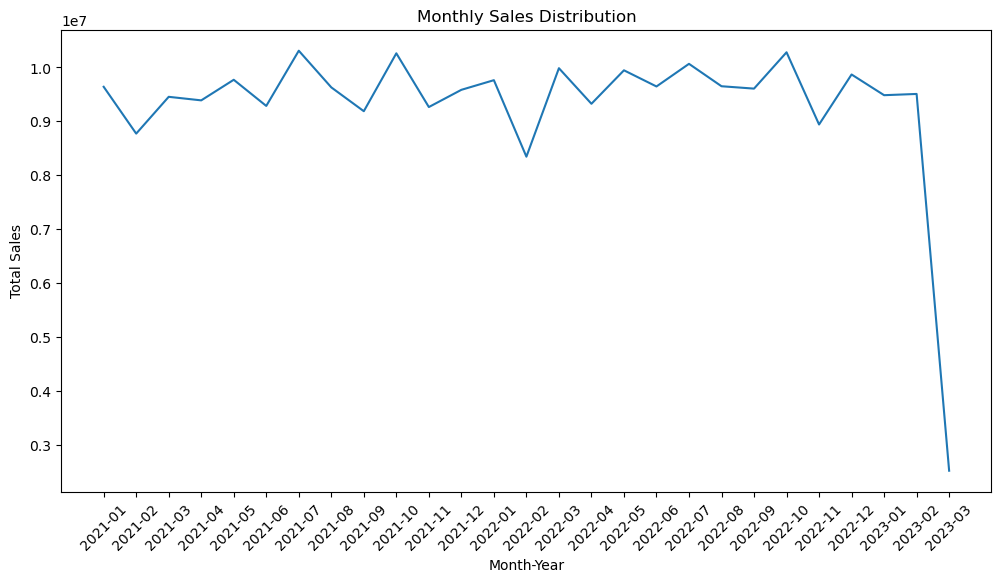

In [50]:
invoice_df['invoice_date'] = pd.to_datetime(invoice_df['invoice_date'], format='%d/%m/%Y')
invoice_df['month_year'] = invoice_df['invoice_date'].dt.to_period('M')
monthly_sales = invoice_df.groupby('month_year')['total_sales'].sum()

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index.astype(str), monthly_sales.values)
plt.xlabel('Month-Year')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Distribution')
plt.xticks(rotation=45)
plt.show()

HARD

1. Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).

In [57]:
customer_df['decade_age_range'] = pd.cut(customer_df['age'], bins=np.arange(0, 101, 10), right=False, labels=False)
customer_df['decade_age_range'] = customer_df['decade_age_range'] * 10
labels = ['{}-{}'.format(i, i + 9) for i in range(0, 100, 10)]
customer_df['decade_age_range'] = pd.cut(customer_df['age'], bins=np.arange(0, 101, 10), right=False, labels=labels)
merged_df = pd.merge(invoice_df, customer_df, left_on='customer_id', right_on='id')
pivot_table = pd.pivot_table(merged_df, values='total_sales', index='category', columns='decade_age_range', aggfunc=np.sum)
pivot_table

C:\Users\sofpa\AppData\Local\Temp\ipykernel_23696\1989554063.py:6: FutureWarning: The provided callable <function sum at 0x000001633844D940> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_table = pd.pivot_table(merged_df, values='total_sales', index='category', columns='decade_age_range', aggfunc=np.sum)


decade_age_range,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89,90-99
category,,,,,,,,,,
Books,0.0,12801.75,79461.75,84143.10,87203.40,74962.20,80476.80,54827.85,26664.00,0.0
Clothing,0.0,1927413.84,10250732.80,11354126.96,11215189.92,10321851.76,10660642.08,7769371.28,4493698.00,0.0
Cosmetics,0.0,109619.36,605915.32,723544.70,665034.96,587780.96,649990.76,419082.62,254531.60,0.0
Food & Beverage,0.0,13582.31,73491.96,87246.86,89553.29,72425.04,80976.09,55050.98,31332.93,0.0
Shoes,0.0,993281.35,5924878.24,7200839.66,7025590.02,5852857.84,5978893.54,4480269.05,2628744.60,0.0
Souvenir,0.0,12375.15,54943.32,64092.72,66391.80,54943.32,55025.43,38673.81,23718.06,0.0
Technology,0.0,1129800.00,5261550.00,6159300.00,5954550.00,4435200.00,5471550.00,3638250.00,1946700.00,0.0
Toys,0.0,60426.24,385100.80,420582.40,390906.88,345067.52,363955.20,273244.16,153932.80,0.0
